In [9]:
import pandas as pd


In [10]:
df= pd.read_csv("titanic.csv")

**check whether the data is loaded or not**

In [11]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Let's use some typical command to check the data**

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**As the cabin and age column has null values, we need to handle them**
**Let's handle the Age column first**

In [14]:
df["Age"].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [15]:
df["Age"].mean()

29.69911764705882

In [16]:
df["Age"].min()

0.42

In [17]:
df["Age"].max()

80.0

**Now let's do the same for the cabin column**

In [18]:
df["Cabin"].isnull().sum()

687

**For the age column we didn't replace or dropped it but we're going to drop it by using differnt vaariable**

In [19]:
df_2 = df.drop("Cabin", axis=1)


In [20]:
df_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [21]:
df_2["Embarked"].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [22]:
df_2["Embarked"].fillna("S", inplace=True)

C:\Users\foort\AppData\Local\Temp\ipykernel_20772\2970164484.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2["Embarked"].fillna("S", inplace=True)


In [23]:
df_2["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [24]:
df_2.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

**Now let's replace the embarked column with numerical values**

In [89]:
df_2 = df_2.copy()
df_2["Embarked"] = df_2["Embarked"].replace({"S": 0, "C": 1, "Q": 2})

In [90]:
df_2["Embarked"].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

**So, we have to handle the null values in age but we can't use min or max casue we have 29years old and 80 years and 04 years old too, In this case we can use the most frequent valuet to replace the null values.**

In [91]:
df_2["Age"].mode()[0]

24.0

In [92]:
df_2["Age"].fillna(df_2["Age"].mode()[0], inplace=True)

C:\Users\foort\AppData\Local\Temp\ipykernel_20772\2337223316.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2["Age"].fillna(df_2["Age"].mode()[0], inplace=True)


In [93]:
df_2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Let's do some visualization using seaborn**

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
sns.set_style("whitegrid")

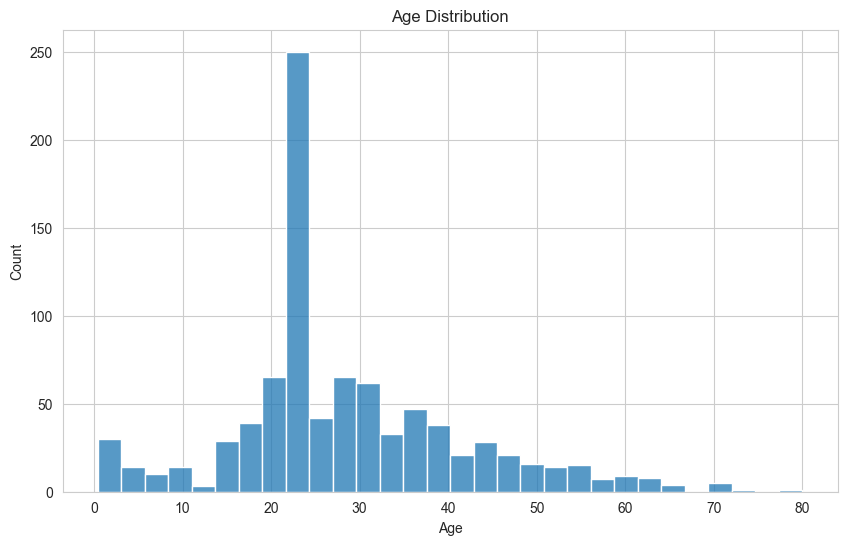

In [96]:
# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df_2, x="Age")
plt.title("Age Distribution")
plt.show()


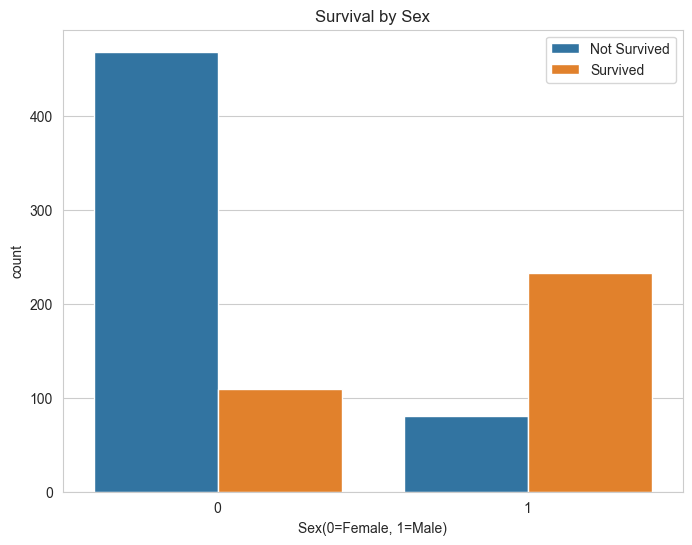

In [97]:
#Example 2: Survival by Sex
plt.figure(figsize=(8,6))
sns.countplot(data=df_2, x="Sex", hue="Survived")
plt.title("Survival by Sex")
plt.xlabel("Sex(0=Female, 1=Male)")
plt.legend(["Not Survived", "Survived"])
plt.show()


In [98]:
df_2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,24.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


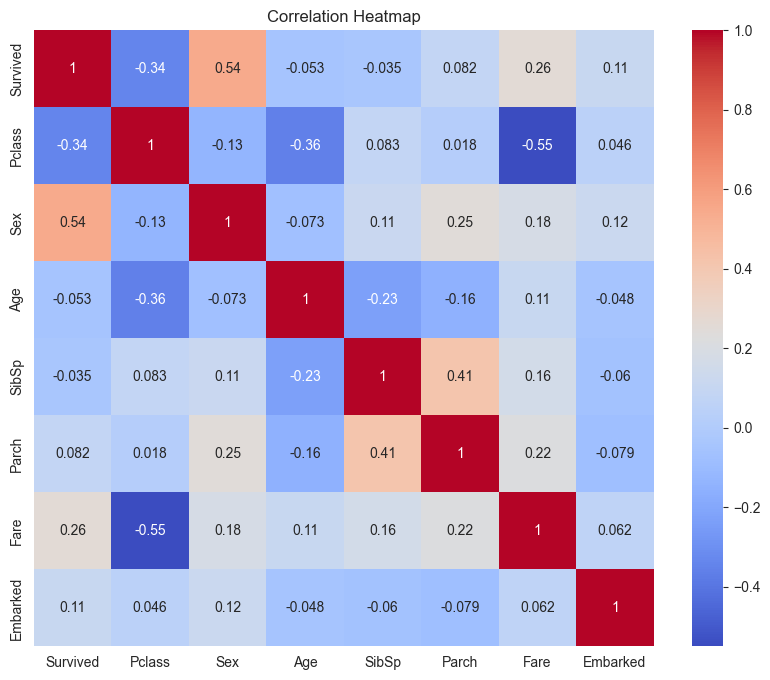

In [99]:
# Example 4: Correlation Heatmap
# get only numeric columns
numeric_columns = df_2.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df_2[numeric_columns]

# Create correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [101]:
df_2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

**Columns to remove: PassengerId, Name, Ticket**

In [100]:
df_2.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

KeyError: "['PassengerId', 'Name', 'Ticket'] not found in axis"

In [102]:
df_2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,24.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


**Let's convert the categorical columns to numerical columns**

In [103]:
df_2["Sex"].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [38]:
df_2["Sex"] = df_2["Sex"].replace({"male": 0, "female": 1})

C:\Users\foort\AppData\Local\Temp\ipykernel_20772\3379478139.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2["Sex"] = df_2["Sex"].replace({"male": 0, "female": 1})


In [104]:
df_2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,24.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


**Let's Separate the data into features and target**

In [106]:
X = df_2.drop("Survived", axis=1)
y = df_2["Survived"]

In [107]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,24.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [108]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [109]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**Let's split the data into training and testing**

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [111]:
len(X_train), len(X_test), len(y_train), len(y_test)

(712, 179, 712, 179)

**Let's train the model**

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
model = LogisticRegression()

In [114]:
print(df_2["Embarked"].value_counts())

Embarked
0    646
1    168
2     77
Name: count, dtype: int64


In [115]:
model.fit(X_train, y_train)

c:\Users\foort\Miniconda3\envs\py39_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Score**

In [116]:
model.score(X_test, y_test) #accuracy

0.7988826815642458

""Now let's get Precision, Recall, F1 Score""

In [117]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [118]:
y_pred = model.predict(X_test)

In [119]:
precision = precision_score(y_test, y_pred)
precision

0.7714285714285715

In [120]:
recall = recall_score(y_test, y_pred)
recall

0.7297297297297297

In [121]:
f1 = f1_score(y_test, y_pred)
f1

0.75

In [122]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[89, 16],
       [20, 54]], dtype=int64)

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

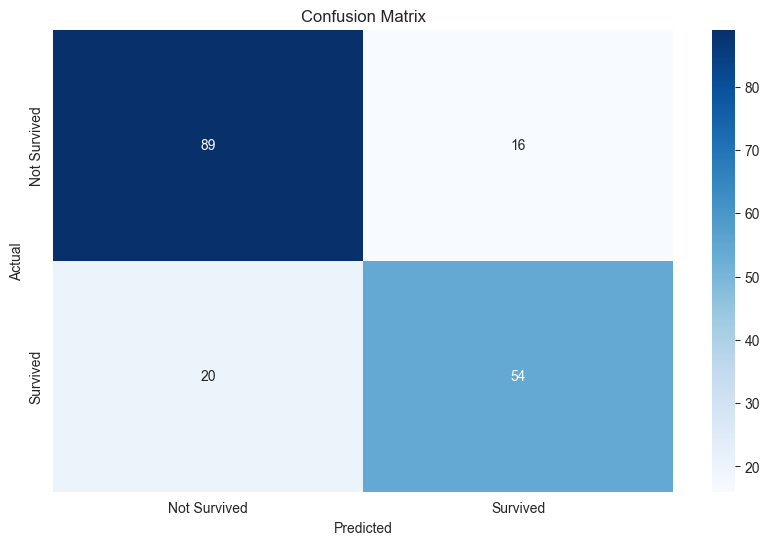

In [124]:
plt.figure(figsize=(10,6))
sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
